In [7]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [11]:
def smooth(y):
    box_pts=2
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [13]:
df = pd.read_csv('Gate Capacitance Modeling.csv')
df = shuffle(df)
#df["vg"].replace({0:1e-3}, inplace=True)
#df["qg"].replace({0:1e-22}, inplace=True)
#Normalize data before feeding to neural network
vg=np.ravel(df["vg"])/10
tch=np.ravel(df["tch"])/1e-9/10
tox=np.ravel(df["tox"])/1e-9/10
mch=np.ravel(df["mch"])/0.1
ub=np.ravel(df["ub"])/10
print(df)
X1=np.array([tch,mch,tox,ub,vg])
df0 = pd.DataFrame(data=X1.T,columns=["tch", "mch","tox","ub","vg"])
#print(df0)
X=df0.iloc[:,0:5]
print(X)
y=df.iloc[:,5:8]
y=y/10
print(y)

             tch    mch           tox   ub   vg        e0        e1        e2
4   5.000000e-09  0.045  1.000000e-09  3.6 -0.6  0.761130  1.303300  2.320500
27  5.000000e-09  0.045  1.000000e-09  3.6  1.7 -0.844300 -0.344950  0.672260
20  5.000000e-09  0.045  1.000000e-09  3.6  1.0 -0.518420  0.001181  1.019300
7   5.000000e-09  0.045  1.000000e-09  3.6 -0.3  0.461180  1.003300  2.020600
28  5.000000e-09  0.045  1.000000e-09  3.6  1.8 -0.890280 -0.393770  0.623320
17  5.000000e-09  0.045  1.000000e-09  3.6  0.7 -0.336480  0.191190  1.209000
25  5.000000e-09  0.045  1.000000e-09  3.6  1.5 -0.752430 -0.247340  0.770120
14  5.000000e-09  0.045  1.000000e-09  3.6  0.4 -0.148700  0.387040  1.404500
1   5.000000e-09  0.045  1.000000e-09  3.6 -0.9  1.061100  1.603300  2.620600
0   5.000000e-09  0.045  1.000000e-09  3.6 -1.0  1.161100  1.703300  2.720600
5   5.000000e-09  0.045  1.000000e-09  3.6 -0.5  0.661100  1.203300  2.220500
33  5.000000e-09  0.045  1.000000e-09  3.6  2.3 -1.120600 -0.638

In [14]:
# Split train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# We'll use Keras to create a Neural network
model = tf.keras.Sequential()
model.add(keras.layers.Dense(32, activation='tanh', input_shape=(5,)))
model.add(keras.layers.Dense(16,activation='tanh'))
#model.add(keras.layers.Dense(8,activation='tanh'))
model.add(keras.layers.Dense(16,activation='tanh'))
#model.add(keras.layers.Dense(16,activation='tanh'))
model.add(keras.layers.Dense(3, activation='tanh'))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

Epoch 1/1000
2/2 [==============================] - 2s 193ms/step - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 3/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 4/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 5/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 6/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 1.6958e-04 - val_mse: 1.6958e-04
Epoch 7/1000
2/2 [==============================] - 0s 36ms/step - loss: 7.0920e-04 - mse: 7.0920e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 8/1000
2/2 [==============================] - 0s 21ms/step -

/home/u203083/.local/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


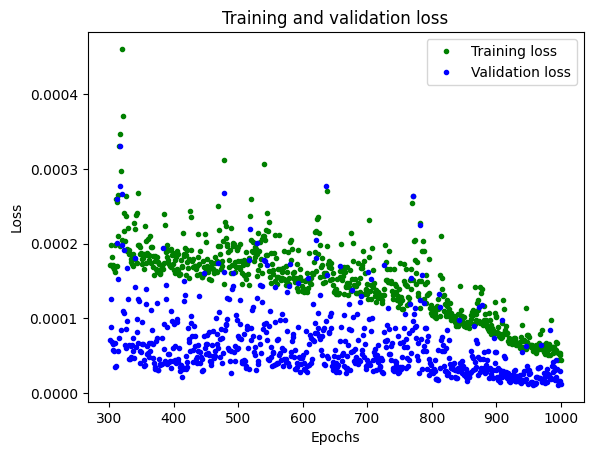

In [15]:
history_1 = model.fit(X_train, y_train, epochs=1000, 
                        validation_data=(X_test, y_test))
#Save the model for future use and data extraction
model.save('trained_model.h5')
#%%
# Exclude the first few epochs so the graph is easier to read
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
SKIP = 300
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
#Load trained model
#model = tf.keras.models.load_model('trained_model.h5') #do not change
# New data input for testing
df_test = pd.read_csv('Gate Capacitance Modeling.csv')
#Normalize data before feeding to neural network
e0=np.ravel(df_test["e0"])
e1=np.ravel(df_test["e1"])
e2=np.ravel(df_test["e2"])
vg1=np.ravel(df_test["vg"])/10
tch1=np.ravel(df_test["tch"])/1e-9/10
tox1=np.ravel(df_test["tox"])/1e-9/10
mch1=np.ravel(df_test["mch"])/0.1
ub1=np.ravel(df_test["ub"])/10
X2=np.array([tch1,mch1,tox1,ub1,vg1])
df0_test = pd.DataFrame(data=X2.T,columns=["tch1", "mch1","tox1","ub1","vg1"])
#print(df0)
xval=df0_test.iloc[:,0:5]
# Predict the new dataset
y_pred = model.predict(xval)

2/2 [==============================] - 0s 2ms/step


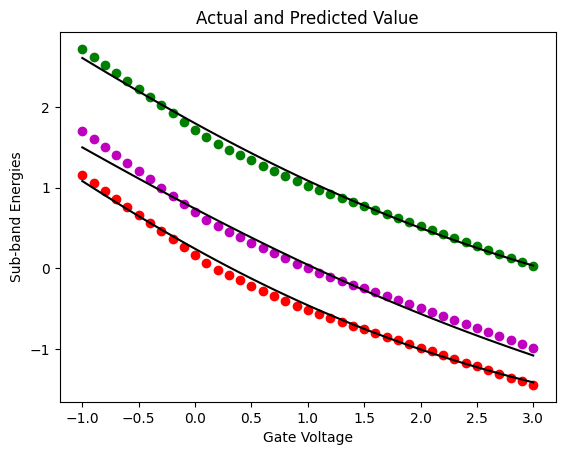

In [18]:
#plot predicted sub band energy
vg_test1=np.ravel(df_test["vg"])
vg_test=vg_test1.reshape(-1,1)
#print(vg)
plt.plot(vg_test, e0, 'ro',vg_test, e1, 'mo', vg_test, e2, 'go')
#plt.plot(vg_test, e1, 'mo', label='Actual')
#plt.plot(vg_test, e2, 'go', label='Actual')
plt.plot(vg_test,10*(y_pred[:,0]), 'k',vg_test,10*(y_pred[:,1]), 'k',vg_test,10*(y_pred[:,2]), 'k')
#plt.plot(vg_test,10*(y_pred[:,0]), 'b', label='Predicted')
#plt.plot(vg_test,10*(y_pred[:,0]), 'b', label='Predicted')
#plt.yscale("log")
plt.title('Actual and Predicted Value')
plt.xlabel('Gate Voltage')
plt.ylabel('Sub-band Energies')
#plt.legend()
plt.show()

In [20]:
#Calculation of Cgg
q = 1.6e-19
mch = 0.05*9.1e-31
hbar = 6.626e-34/(2*3.14);
D=q*mch/(3.14*hbar**2) #2D density of states of channel material
phi_th=0.0259; #thermal voltage
q=1.6e-19; #Electronic charge
Ef=0 #Fermi energy fixed at 0eV
#Load predicted subband energy
E0p=10*np.ravel(y_pred[:,0])
E1p=10*np.ravel(y_pred[:,1])
E2p=10*np.ravel(y_pred[:,2])


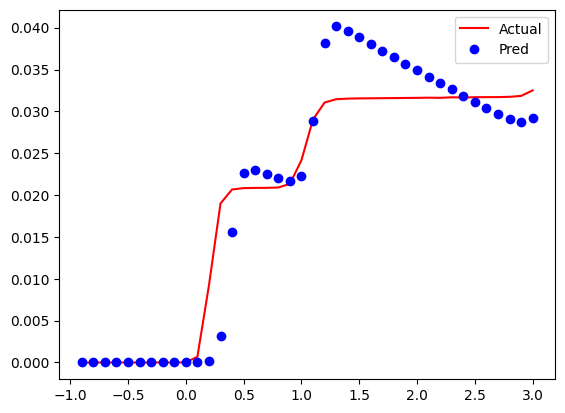

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.05768055e-09
 3.18939852e-08 6.61516495e-07 1.27697740e-05 2.29810139e-04
 3.22255917e-03 1.55532546e-02 2.26432178e-02 2.30054371e-02
 2.25498062e-02 2.20433157e-02 2.16224976e-02 2.22315360e-02
 2.88007688e-02 3.82088311e-02 4.01429273e-02 3.96216474e-02
 3.88413295e-02 3.80409509e-02 3.72449309e-02 3.64549085e-02
 3.56699899e-02 3.48940864e-02 3.41266766e-02 3.33682075e-02
 3.26200202e-02 3.18808481e-02 3.11532617e-02 3.04386765e-02
 2.97432393e-02 2.91052461e-02 2.86975503e-02 2.92150676e-02]


In [21]:
#Calculation of Qinv using Fermi-Dirac function
Qinv_pred=q*D*phi_th*(np.log((1+np.exp((Ef-E0p)/phi_th)))+np.log((1+np.exp((Ef-E1p)/phi_th)))+np.log((1+np.exp((Ef-E2p)/phi_th))))
Qinv_actual=q*D*phi_th*(np.log((1+np.exp((Ef-e0)/phi_th)))+np.log((1+np.exp((Ef-e1)/phi_th)))+np.log((1+np.exp((Ef-e2)/phi_th))))
Cgg_actual=np.diff(Qinv_actual)/np.diff(vg_test1)
Cgg_pred=np.diff(Qinv_pred)/np.diff(vg_test1)
plt.plot(vg_test[1:len(vg_test1)], Cgg_actual, 'r', label='Actual')
plt.plot(vg_test[1:len(vg_test1)], Cgg_pred, 'bo', label='Pred')
#plt.plot(vg_test,10**(-1/y_pred), 'b', label='Predicted')
plt.legend()
plt.show()
print(Cgg_pred)
#plt.plot(vg_test, Qinv_actual, 'r', label='Actual')
#plt.plot(vg_test, Qinv_pred, 'bo', label='Pred')
#plt.plot(vg_test,10**(-1/y_pred), 'b', label='Predicted')
#plt.show()
Cgg_preddd=Cgg_pred
Cgg_pred1=Cgg_pred

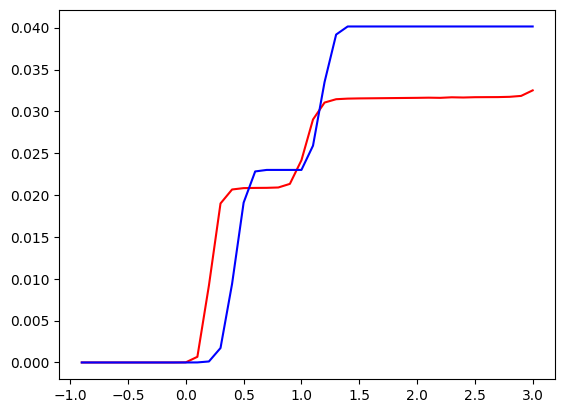

In [22]:
for i in range(0,len(Cgg_pred)-1):
    if Cgg_pred[i+1] < Cgg_pred[i]:
        Cgg_pred1[i+1]=Cgg_pred[i]
    else :
        Cgg_pred1[i+1]=Cgg_pred[i+1]
    Cgg_pred = Cgg_pred1
#print(Cgg_pred1)
plt.plot(vg_test[1:len(vg_test1)], Cgg_actual, 'r', label='Actual')
plt.plot(vg_test[1:len(vg_test1)], smooth(Cgg_pred1), 'b', label='Pred')
plt.show()

In [23]:
#Error metric calculation
#calcularion of R^2 value
actual=Cgg_actual
predicted=Cgg_pred1
corr_matrix = np.corrcoef(actual, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)
#%%Calculation of MSE
MSE = (1/len(Cgg_actual))*np.sum((Cgg_actual - Cgg_pred1)**2)
print('Mean Squared Error: ',MSE)
#print(rms_err/1e-6)
#Calculation of MAE

#calculation of RMSE error
rms_err = np.sqrt((1/len(Cgg_actual))*np.sum((Cgg_actual - Cgg_pred1)**2))
print('RMS Error is: ',rms_err/1e-6)

0.9419645635548883
Mean Squared Error:  4.295405820985923e-05
RMS Error is:  6553.934559473358
